# Predictive modelling of H1N1 Vaccine uptake

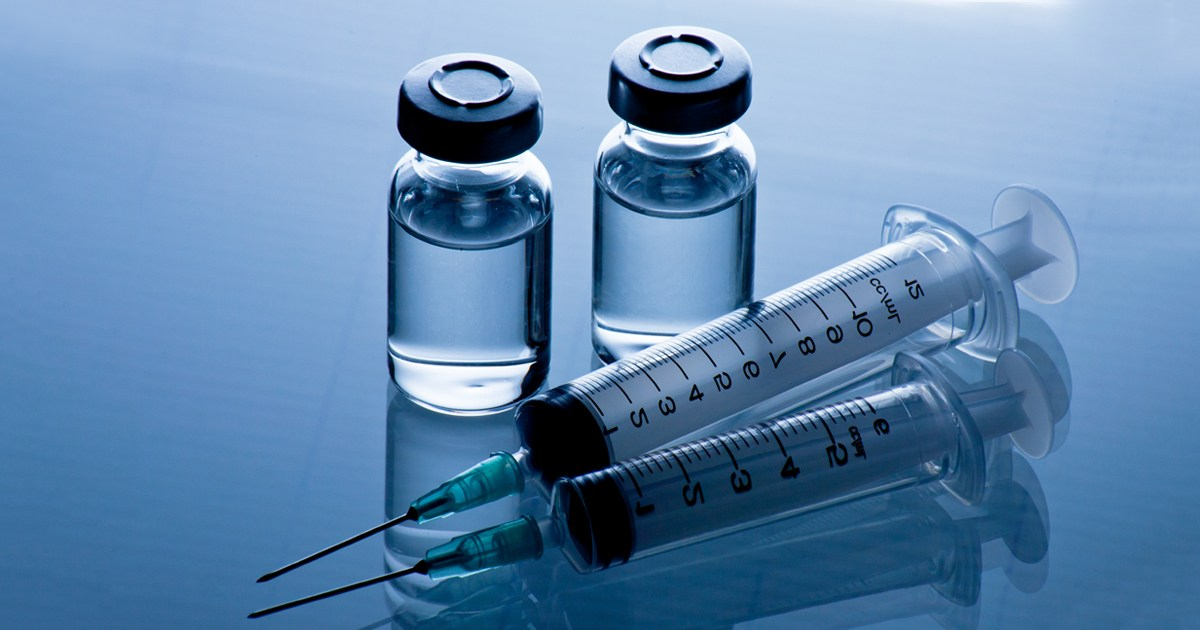

# 1. Business Understanding

## Business Problem

The National 2009 H1N1 Flu Survey was carried out to establish the uptake of the vaccine. This provided an understanding of how people's opinions, age, demographic factors and health behaviours are related to the vaccination patterns.

The aim of this project is to examine the data collected and develop a predicive model that can pinpoint certain characteristics of individuals who are likely to partake or not partake the vaccine.

This model will serve as a valuable tool for shaping and predicting what type, i.e characteristics of individuals likely to get the vaccines now and in future and will enable in resource allocation in distribution of vaccines, education and outreach programs.

## Project Objectives

1) Identify which factors affect individuals' response to vaccines

2) Which model is best for predicting whether individuals will be vaccinated

3) How well do different machine learning models perform the prediction of  vaccine uptake.

# 2. Data Understanding

The data used in this project was retrieved from DrivenData. 
The dataset contains data on:

i)   training features
ii)  training labels 
iii) test features

The data on the training features (the input variables that the model will use to predict the probability that people received H1N1 flu vaccines and seasonal flu vaccines) contains 35 feature columns in total, each a response to a survey question. These questions cover several different topics, such as whether people observed safe behavioral practices, their opinions about the diseases and the vaccines, and their demographics.

The data on training labels (the labels corresponding to the observations in the training features) contains two target variables : h1n1_vaccine and seasonal_vaccine. Both are binary variables, with 1 indicating that a person received the respective flu vaccine and 0 indicating that a person did not receive the respective flu vaccine.

For this project the focus will be on one target variable h1n1_vaccine.

## Data description

## Loading and checking the data

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc


Loading the dataset

In [2]:
# checking the top of our dataset
train_features_df = pd.read_csv("training_set_features.csv")
train_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# checking the bottom of our dataset
train_features_df.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [4]:
# checking the shape: no.of values in the dataset
train_features_df.shape

(26707, 36)

In [5]:
# Checking the datatype of each column
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

This dataset contains 26707 observations and 36 features.
The features dataset contains a combination of floats, integers and object data types.

In [6]:
# checking the top of our labels dataset
train_labels_df = pd.read_csv("training_set_labels.csv")
train_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [7]:
# checking the bottom of our labels dataset
train_labels_df.tail()

,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [8]:
train_labels_df.shape

(26707, 3)

In [9]:
# Checking the datatype of each column
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


The labels dataframe contains 26707 observations and 3 columns, all intergers and no null values

In [10]:
# Drop the seasonal_vaccine since h1n1 is our target variable in this project
train_labels_df = train_labels_df.drop(['seasonal_vaccine'], axis=1)
train_labels_df.head()

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [11]:
# joining the train_labels and train_features into one dataframe
h1n1_df = train_features_df.merge(train_labels_df, on='respondent_id', how='left')
print(h1n1_df.shape)
h1n1_df.head()

(26707, 37)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [12]:
h1n1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [13]:
# Drop all columns related to the seasonal flu
h1n1_df = h1n1_df.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1)
print(h1n1_df.shape)
h1n1_df.head()

(26707, 33)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


The resulting dataset has 26707 rows and 33 columns


In [14]:
# Checking for missing values
print(h1n1_df.isna().sum())

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
c

In [15]:
# Checking for missing values as a %ge
print((h1n1_df.isna().sum()/ len(h1n1_df)) * 100)

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
age_group                       0.000000
education                       5.268282
race                            0.000000
sex                             0.000000
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own     

## EDA before data processing

Looking at the data before cleaning is important to understand the structure of the data, identify missing values, outliers, inconsistencies, and any other data quality issues.

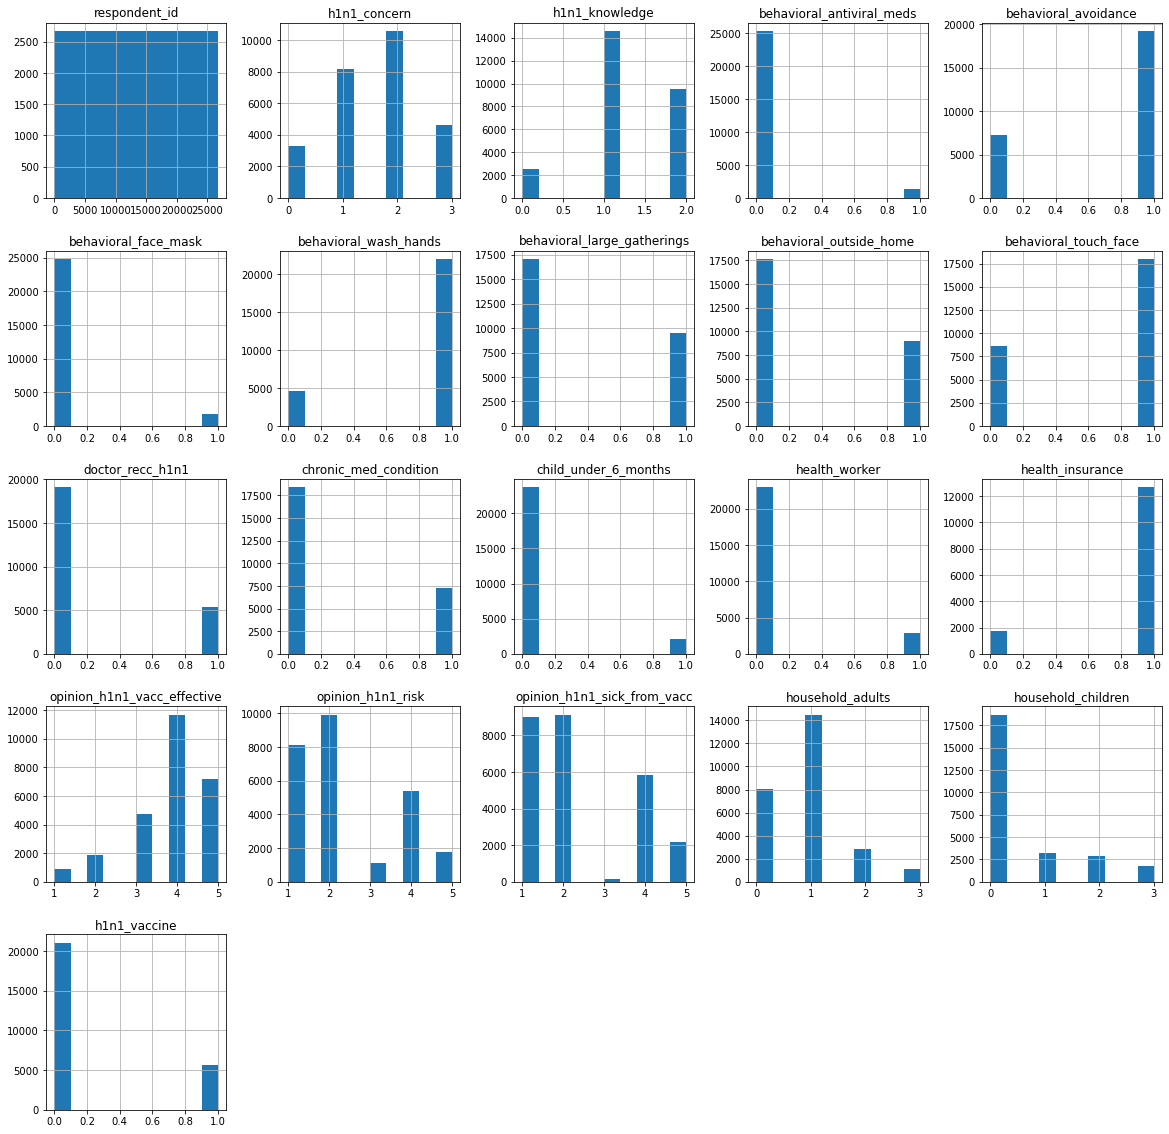

In [16]:
# Distribution of training dataset
h1n1_df.hist(figsize=(20,20));

From the histograms above, it is evident that all variables are categorical.

However, some datatypes described as objects are plotted as below

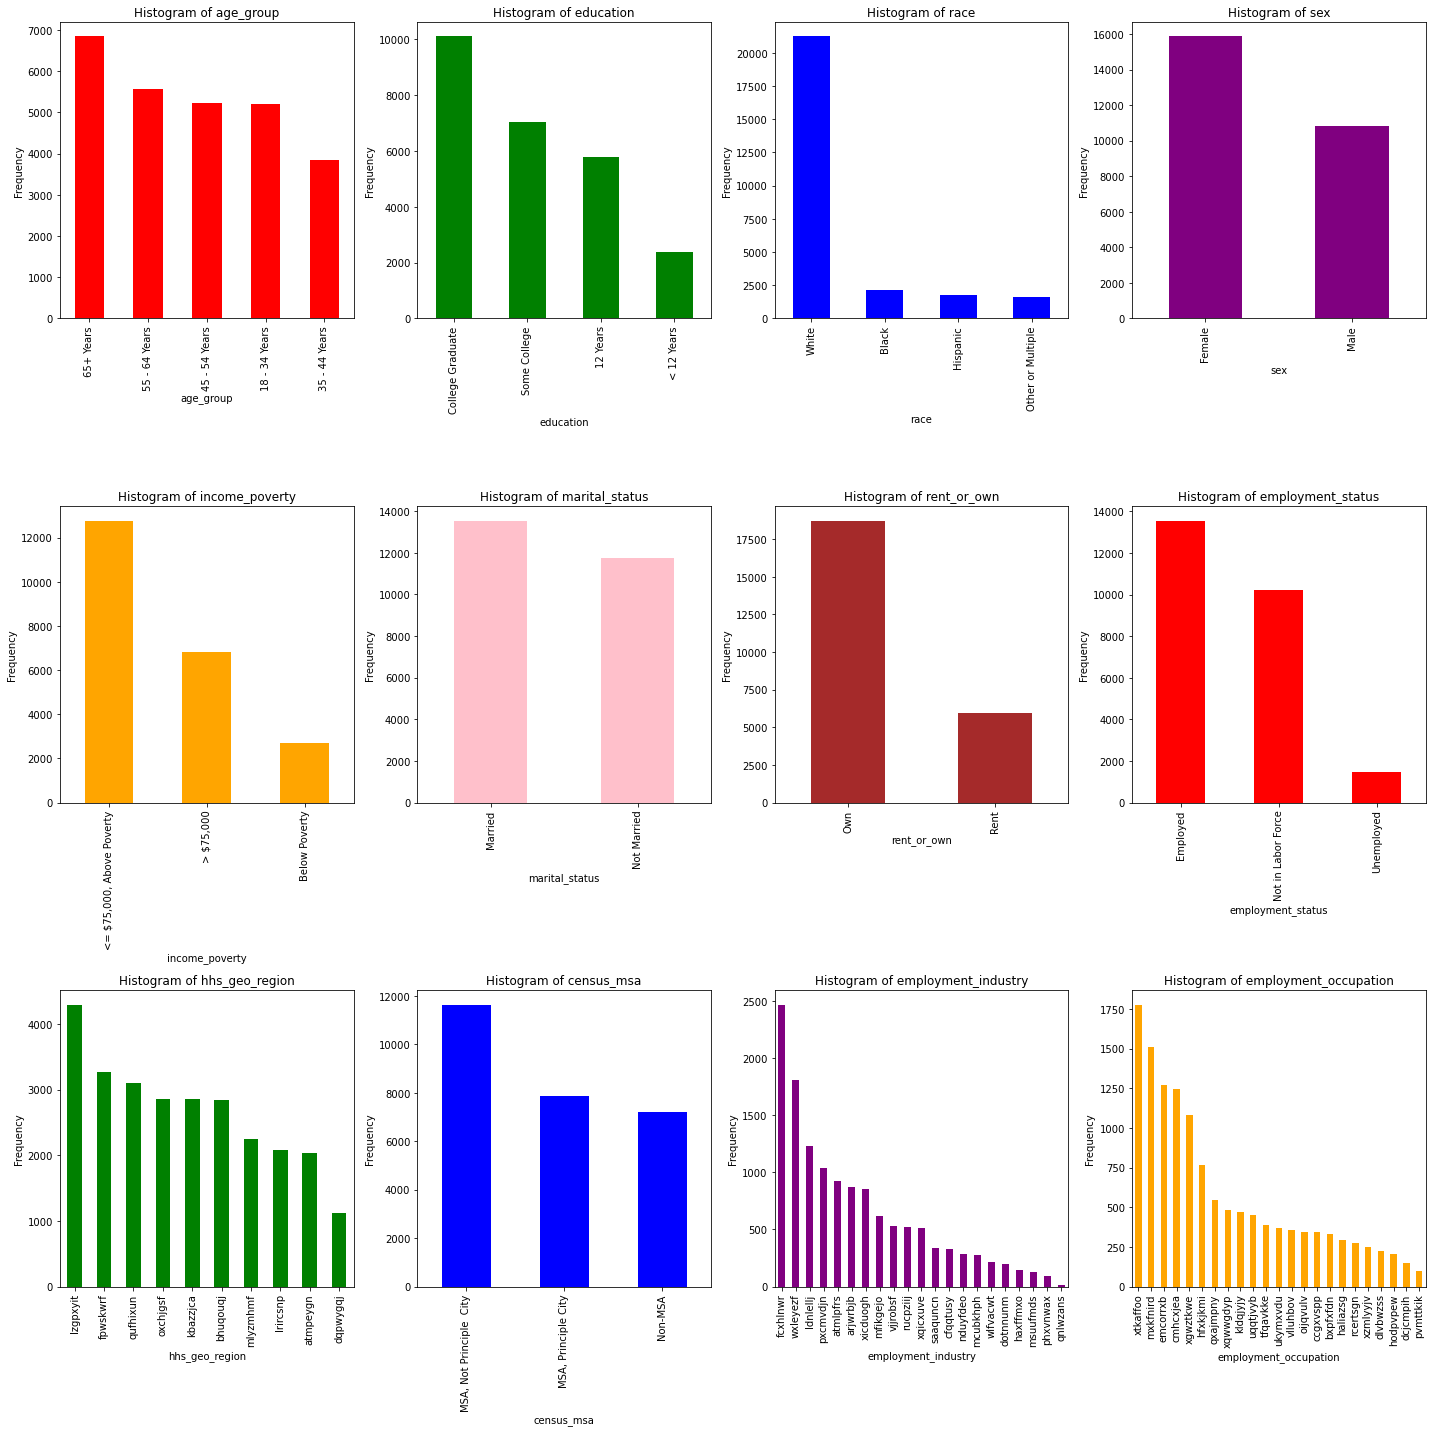

In [17]:
# Filtering columns with object data
object_data_columns = h1n1_df.select_dtypes(include=['object'])

# Define colors
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']

# Set up subplots
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Loop through each object column to plot histogram
for i, (column, ax) in enumerate(zip(object_data_columns, axes.flatten())):
    if i >= len(colors):
        i = i % len(colors)  
    value_counts = h1n1_df[column].value_counts()

    # Create a bar plot for the counts
    value_counts.plot(kind='bar', color=colors[i], ax=ax)

    # Set labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Display the plot
plt.tight_layout()
plt.show()

From the histogram graphs above, even columns described as objects are categorical. Therefore, this is a classification task and a categorical model will be created to make predictions.

# 3. Data Preparation

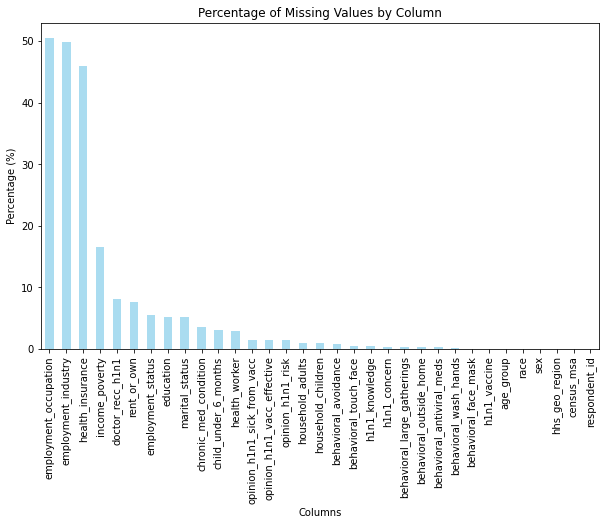

In [18]:
# Calculate the percentage of missing values for each column
missing_percentage = (h1n1_df.isna().mean() * 100).round(2)

# Sort the missing_percentage Series in ascending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Create a bar plot to visualize the missing percentage
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.show()

In [19]:
# Dropping columns that are not very necessary. health_insurance isnt really necessary because the jab was free.
# hhs_geo_region, employment_occupation and employment_industry have codes that are not readable
# and are also columns with the most missin data except respondent_id
h1n1_df = h1n1_df.drop(['respondent_id','hhs_geo_region', 'employment_occupation', 'employment_industry', 'health_insurance'], axis=1)
h1n1_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [20]:
#Check for missing values in the training dataset
def find_missing_values(dataframe):
    return dataframe.isna().sum().sort_values(ascending=False)

find_missing_values(h1n1_df)

income_poverty                 4423
doctor_recc_h1n1               2160
rent_or_own                    2042
employment_status              1463
marital_status                 1408
education                      1407
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_sick_from_vacc     395
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
household_children              249
household_adults                249
behavioral_avoidance            208
behavioral_touch_face           128
h1n1_knowledge                  116
h1n1_concern                     92
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_antiviral_meds        71
behavioral_wash_hands            42
behavioral_face_mask             19
age_group                         0
race                              0
sex                               0
census_msa                        0
h1n1_vaccine                

In [21]:
# Obtaining the descriptive statistics of our DataFrame
h1n1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


In [22]:
# Checking for missing values
print(h1n1_df.isna().sum().sum())

18015


In [23]:
# Apply mode fillna only to numeric columns
numeric_columns = h1n1_df.select_dtypes(include=['number']).columns
modes = h1n1_df[numeric_columns].mode().iloc[0]  # Calculate mode for each numeric column
h1n1_df[numeric_columns] = h1n1_df[numeric_columns].fillna(modes)  # Fill missing values with respective modes

In [24]:
# Checking for missing values
print(h1n1_df.isna().sum())

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
census_msa                        0
household_adults                  0
household_children                0
h1n1_vaccine                

In [25]:
# Checking data of the objects columns
column_indices = [17, 20, 21, 22, 23]
non_numeric_df = h1n1_df.iloc[:, column_indices]
non_numeric_df

,education,income_poverty,marital_status,rent_or_own,employment_status
0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force
1,12 Years,Below Poverty,Not Married,Rent,Employed
2,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed
3,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force
4,Some College,"<= $75,000, Above Poverty",Married,Own,Employed
...,...,...,...,...,...
26702,Some College,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force
26703,College Graduate,"<= $75,000, Above Poverty",Not Married,Rent,Employed
26704,Some College,NaN,Not Married,Own,NaN
26705,Some College,"<= $75,000, Above Poverty",Married,Rent,Employed


In [26]:
# Filling only to object columns with unknown
h1n1_df['employment_status'].fillna(value='Unknown', inplace=True)
h1n1_df['rent_or_own'].fillna(value='Unknown', inplace=True)
h1n1_df['marital_status'].fillna(value='Unknown', inplace=True)
h1n1_df['income_poverty'].fillna(value='Unknown', inplace=True)
h1n1_df['education'].fillna(value='Unknown', inplace=True)

In [27]:
# Checking for missing values
print(h1n1_df.isna().sum().sum())

0


In [28]:
# Checking for duplicates
h1n1_df.duplicated().sum()

66

In [29]:
# Droppin and checking if all duplicates are dropped
h1n1_df.drop_duplicates(inplace=True)
print(h1n1_df.duplicated().sum())

0


In [30]:
# Checkin the final data values
h1n1_df.shape

(26641, 28)

## EDA after data processing

In this section, I explore the dataset further to better understand which individuals' attributes are highly related to H1N1 vaccine and ultimately to build a classification model that can accurately predict whether someone received the H1N1 vaccine based on their measurements. By exploring the data, I may be able to see which variables or which combination of variables provide the most information about whether or not the individual got the vaccine.

The response variable for this analysis is h1n1_vaccine.

### Univariate Analysis

Looking at the distribution of the target variable(h1n1_vaccine).

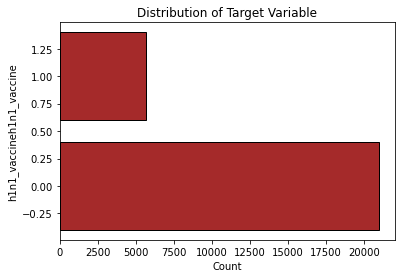

In [31]:
# Select the target column
h1n1_vaccine = h1n1_df['h1n1_vaccine']

# Get the unique values and their frequency in the target column
unique_values, counts = np.unique(h1n1_vaccine, return_counts=True)

# Create a bar plot
fig, ax = plt.subplots()
ax.barh(unique_values, counts, color='brown', edgecolor='black')

# Set the x-axis label
ax.set_xlabel('Count')

# Set the y-axis label
ax.set_ylabel('h1n1_vaccineh1n1_vaccine')

# Set the title
ax.set_title('Distribution of Target Variable')

# Show the plot
plt.show()

In [32]:
# Checking the distribution of our target variable h1n1 vaccine
distribution = train_labels_df["h1n1_vaccine"].value_counts(normalize=True)*100
print(f"The number of people vaccinated are {distribution[1]}%")

The number of people vaccinated are 21.24536638334519%


### Bivariate analysis

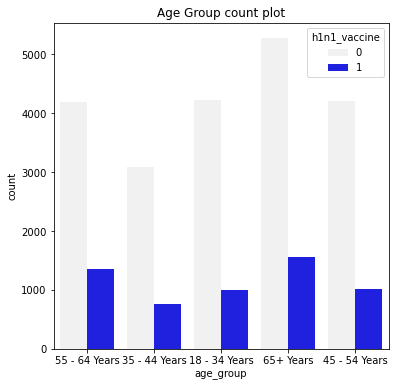

In [33]:
#Bivariate analysis
plt.figure(figsize=(6,6))
sns.countplot(x=h1n1_df['age_group'], hue=h1n1_df['h1n1_vaccine'] , color='b')
plt.title("Age Group count plot")
plt.show()

This shows the distribution of the vaccine uptake among the age groups was almost equal

### Observing for multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated making it difficult to distinguish the individual effects of each variable on the dependent variable. In the next step, we will assess the relationships between independent variables to ensure they are not highly correlated with each other

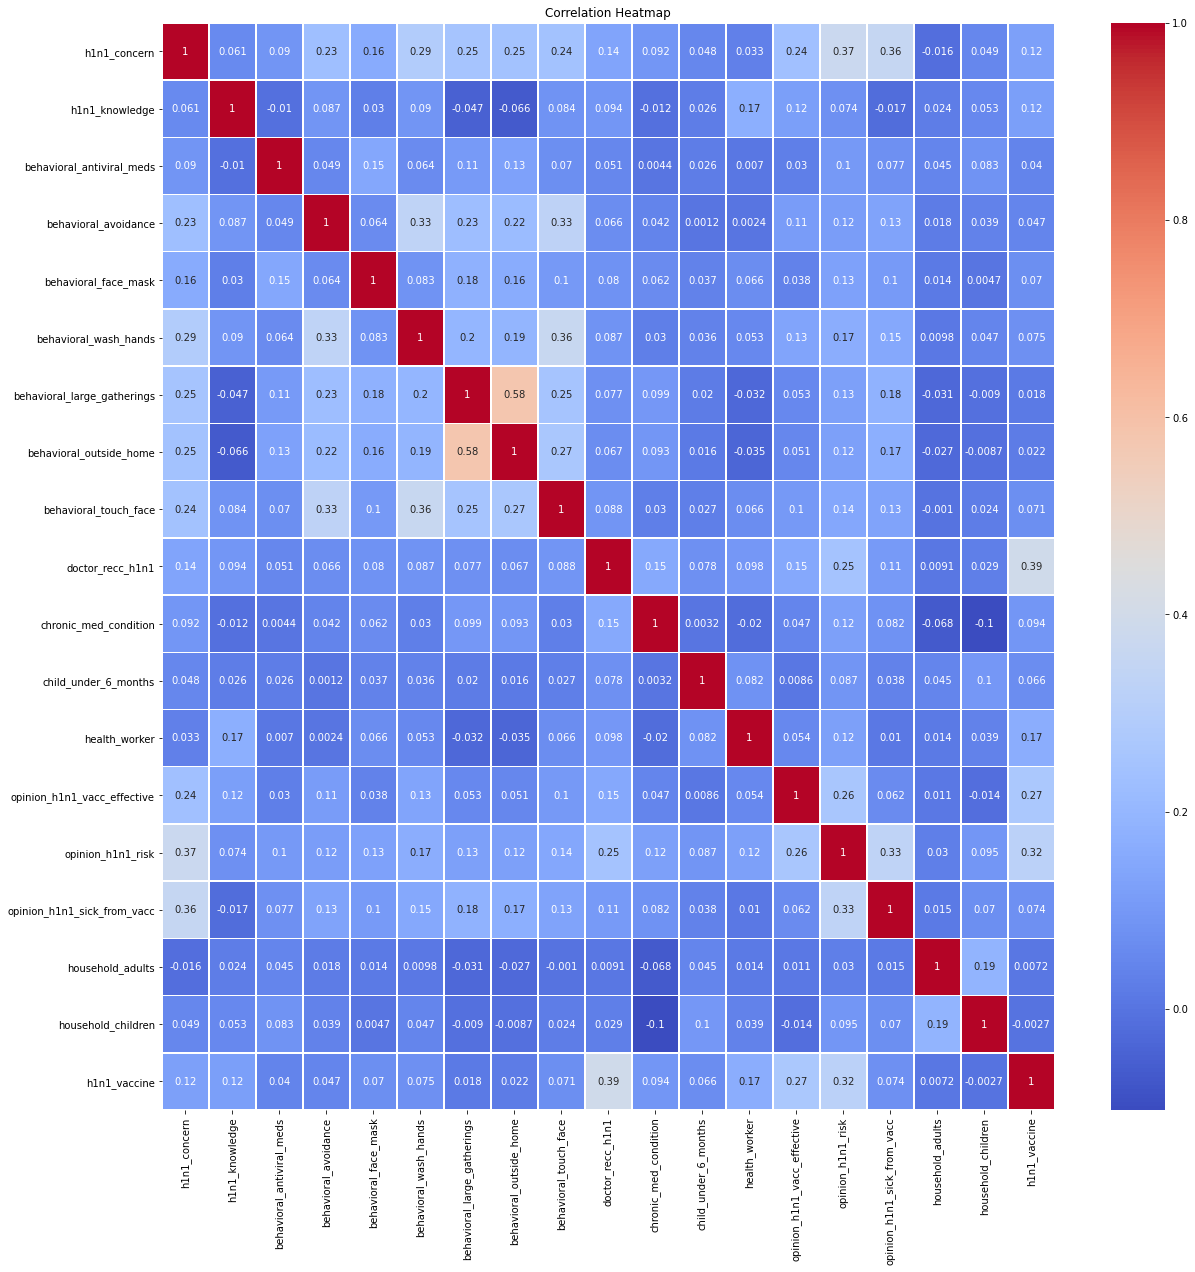

In [34]:
# Plotting the heatmap to check the correlationship
corr = h1n1_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The observation from the above heat map shows the highest correlation figure is 58% which indicates there is no multicollinearity.


## Formatting Data/Feature Engineering

At this point we will format data for easier understanding by the machine learning models. we will label encode and scale the data.

### Label Encoding

In [35]:
# Specify columns specified as objects
#h1n1_df_categorical = h1n1_df.select_dtypes(exclude=["int64", "float64"])
#h1n1_df_categorical.columns


In [36]:
#def label_encoder(to_encode):
  # Create an instance of LabelEncoder
  #le = LabelEncoder()

  # Loop over each categorical column and apply LabelEncoder
  #for col in h1n1_df_categorical:
    #to_encode[col] = le.fit_transform(to_encode[col])
  #return to_encode
#label_encoder(h1n1_df.head())

In [37]:
# split the data into training and testing data before scaling
# 80% of the data is utilised during training
X = h1n1_df.drop('h1n1_vaccine',axis = 1)
y = h1n1_df['h1n1_vaccine']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [38]:
# Converting the non-numerical labels into numerical in the X_train data
label_encoder = LabelEncoder()

X_train['age_group'] = label_encoder.fit_transform(X_train['age_group'])
X_train['education'] = label_encoder.fit_transform(X_train['education'])
X_train['race'] = label_encoder.fit_transform(X_train['race'])
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_train['marital_status'] = label_encoder.fit_transform(X_train['marital_status'])
X_train['rent_or_own'] = label_encoder.fit_transform(X_train['rent_or_own'])
X_train['census_msa'] = label_encoder.fit_transform(X_train['census_msa'])
X_train['employment_status'] = label_encoder.fit_transform(X_train['employment_status'])
X_train['income_poverty'] = label_encoder.fit_transform(X_train['income_poverty'])

# Preview the top of the data
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
3573,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3,3,1,3,0,1,0,2,1.0,0.0
26569,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,3,1,1,0,0,0,0,2.0,0.0
26017,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,3,0,2,1,0,1,2,0.0,0.0
12160,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,3,1,0,1,0,0,0,1.0,0.0
12631,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,3,0,0,1,0,1,1,0.0,0.0


In [39]:
# Converting the non-numerical labels into numerical in the X_test data
label_encoder = LabelEncoder()

X_test['age_group'] = label_encoder.fit_transform(X_test['age_group'])
X_test['education'] = label_encoder.fit_transform(X_test['education'])
X_test['race'] = label_encoder.fit_transform(X_test['race'])
X_test['sex'] = label_encoder.fit_transform(X_test['sex'])
X_test['marital_status'] = label_encoder.fit_transform(X_test['marital_status'])
X_test['rent_or_own'] = label_encoder.fit_transform(X_test['rent_or_own'])
X_test['census_msa'] = label_encoder.fit_transform(X_test['census_msa'])
X_test['employment_status'] = label_encoder.fit_transform(X_test['employment_status'])
X_test['income_poverty'] = label_encoder.fit_transform(X_test['income_poverty'])

# Preview the top of the data
X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
9721,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,3,0,1,1,0,0,2,0.0,0.0
8131,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,3,1,0,0,0,0,1,1.0,0.0
1610,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,3,0,0,0,0,1,0,1.0,2.0
12340,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,3,0,0,1,0,1,2,0.0,0.0
26076,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,3,0,0,1,1,1,2,0.0,0.0


In [40]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the age group column
h1n1_df['age_group'] = label_encoder.fit_transform(h1n1_df['age_group'])
h1n1_df['education'] = label_encoder.fit_transform(h1n1_df['education'])
h1n1_df['race'] = label_encoder.fit_transform(h1n1_df['race'])
h1n1_df['sex'] = label_encoder.fit_transform(h1n1_df['sex'])
h1n1_df['marital_status'] = label_encoder.fit_transform(h1n1_df['marital_status'])
h1n1_df['rent_or_own'] = label_encoder.fit_transform(h1n1_df['rent_or_own'])
h1n1_df['census_msa'] = label_encoder.fit_transform(h1n1_df['census_msa'])
h1n1_df['employment_status'] = label_encoder.fit_transform(h1n1_df['employment_status'])
h1n1_df['income_poverty'] = label_encoder.fit_transform(h1n1_df['income_poverty'])

# Display the DataFrame with label encoded column
print(h1n1_df[['age_group','education','race','sex','marital_status','rent_or_own','census_msa','employment_status','income_poverty']])

# To see the mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


       age_group  education  race  sex  marital_status  rent_or_own  \
0              3          1     3    0               1            0   
1              1          0     3    1               1            1   
2              0          2     3    1               1            0   
3              4          0     3    0               1            1   
4              2          3     3    0               0            0   
...          ...        ...   ...  ...             ...          ...   
26702          4          3     3    0               1            0   
26703          0          2     3    1               1            1   
26704          3          3     3    0               1            0   
26705          0          3     1    0               0            1   
26706          4          3     3    1               0            0   

       census_msa  employment_status  income_poverty  
0               2                  1               2  
1               0                  0 

In [41]:
# Previewing the columns
h1n1_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine'],
      dtype='object')

The categorical feature values have been encoded by unique values i.e 0,1,2,3 and 4.

In [42]:
# Checking the information on data types
h1n1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26641 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26641 non-null  float64
 1   h1n1_knowledge               26641 non-null  float64
 2   behavioral_antiviral_meds    26641 non-null  float64
 3   behavioral_avoidance         26641 non-null  float64
 4   behavioral_face_mask         26641 non-null  float64
 5   behavioral_wash_hands        26641 non-null  float64
 6   behavioral_large_gatherings  26641 non-null  float64
 7   behavioral_outside_home      26641 non-null  float64
 8   behavioral_touch_face        26641 non-null  float64
 9   doctor_recc_h1n1             26641 non-null  float64
 10  chronic_med_condition        26641 non-null  float64
 11  child_under_6_months         26641 non-null  float64
 12  health_worker                26641 non-null  float64
 13  opinion_h1n1_vac

In [43]:
# Check unique values in each column
for column in h1n1_df.columns:
    print(f"Unique values in '{column}': {h1n1_df[column].unique()}")

Unique values in 'h1n1_concern': [1. 3. 2. 0.]
Unique values in 'h1n1_knowledge': [0. 2. 1.]
Unique values in 'behavioral_antiviral_meds': [0. 1.]
Unique values in 'behavioral_avoidance': [0. 1.]
Unique values in 'behavioral_face_mask': [0. 1.]
Unique values in 'behavioral_wash_hands': [0. 1.]
Unique values in 'behavioral_large_gatherings': [0. 1.]
Unique values in 'behavioral_outside_home': [1. 0.]
Unique values in 'behavioral_touch_face': [1. 0.]
Unique values in 'doctor_recc_h1n1': [0. 1.]
Unique values in 'chronic_med_condition': [0. 1.]
Unique values in 'child_under_6_months': [0. 1.]
Unique values in 'health_worker': [0. 1.]
Unique values in 'opinion_h1n1_vacc_effective': [3. 5. 4. 2. 1.]
Unique values in 'opinion_h1n1_risk': [1. 4. 3. 2. 5.]
Unique values in 'opinion_h1n1_sick_from_vacc': [2. 4. 1. 5. 3.]
Unique values in 'age_group': [3 1 0 4 2]
Unique values in 'education': [1 0 2 3 4]
Unique values in 'race': [3 0 2 1]
Unique values in 'sex': [0 1]
Unique values in 'income_po

In [44]:
# split the data into training and testing data before scaling
#80% of the data is utilised during training
X = h1n1_df.drop('h1n1_vaccine',axis = 1)
y = h1n1_df['h1n1_vaccine']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

### Scaling

Normalizing the train and test data using scaling so that they have a standardized range of values

In [45]:
# Standardizing the data
#scaler = MinMaxScaler()
#X_train_transformed = scaler.fit_transform(X_train)
#X_test_transformed = scaler.transform(X_test)

In [46]:
# Standardizing the data
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# 4. Modelling

The modelling section seeks to answer the question; Which model is best for predicting whether individuals will be vaccinated? EWe will test the below 3 models.

1.Logistic regression

2.Decision trees

3.Random forests

### 1 Logistic regression

Logistic regression is commonly used for binary classification tasks where the target variable is binary (e.g., yes/no or 0/1).

In [47]:
# Checking the data values of the train and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print()
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21312, 27)
X_test shape: (5329, 27)
y_train shape: (21312,)
y_test shape: (5329,)

X_train_transformed shape: (21312, 27)
X_test_transformed shape: (5329, 27)
y_train shape: (21312,)
y_test shape: (5329,)


In [48]:
# Fit the training set into the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [49]:
# Fit the training set into the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 
model_log = logreg.fit(X_train_transformed, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [50]:
# Predict y_values from training dataset
y_hat_train = logreg.predict(X_train_transformed)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    15536
1     5776
Name: Residuals (counts), dtype: int64

0    0.728979
1    0.271021
Name: Residuals (proportions), dtype: float64


In [51]:
# Predict y_values from test dataset
y_hat_test = logreg.predict(X_test_transformed)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    3908
1    1421
Name: Residuals (counts), dtype: int64

0    0.733346
1    0.266654
Name: Residuals (proportions), dtype: float64


In [52]:
def display_metrics(true, preds):
    
    print(f'Accuracy: {accuracy_score(true, preds)}')
    print(f'F1-Score: {f1_score(true, preds)}')
    print(f'Recall-Score: {recall_score(true, preds)}')
    print(f'Precision-Score: {precision_score(true, preds)}')
    
print('Logistic Regression\n')
display_metrics(y_train, y_hat_train)
print()
display_metrics(y_test, y_hat_test)

Logistic Regression

Accuracy: 0.728978978978979
F1-Score: 0.5492430154518495
Recall-Score: 0.7764783759929391
Precision-Score: 0.42489736778555903

Accuracy: 0.733345843497842
F1-Score: 0.5521588402143082
Recall-Score: 0.7684210526315789
Precision-Score: 0.4308903098868667


This means that 73% of the time, our model accurately predicts whether an individual got the h1n1 vaccine or not. However, the f1 score is low due to also a low perecision score. We will model others and see the difference

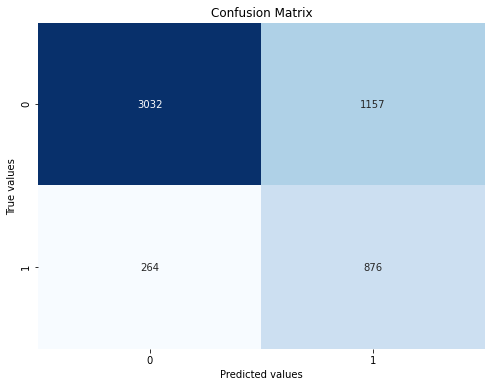

In [53]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_hat_test)

# Display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix")
plt.show()

True positives(TP)=3,032 observations.This means that out of the total dataframe, 3,032 were predicted to have taken the vaccine actually took the vaccine.

True Negatives(TN)=876 observations. This means that out of the total dataset, 876 people were correctly predicted to not have taken the vaccine.

False Positives(FP)=1,157 observations. Out of the total, 1,157 were predicted to have taken the vaccine but they did not.

False Negatives(FN)=264 observations. Out of the total, 264 were predicted to have not taken the vaccine but they did

### 2 Decision trees

In [54]:
# fitting the decision tree classifier to our training data
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_transformed, y_train)
clf

DecisionTreeClassifier(criterion='entropy')

In [55]:
# use it to make predictions on the test data
y_test_preds = clf.predict(X_test_transformed)

print("Test")
print('Accuracy: ', accuracy_score(y_test, y_test_preds))
print('F1-Score: ', f1_score(y_test, y_test_preds))
print('Recall-Score: ', recall_score(y_test, y_test_preds))
print('Precision-Score: ', precision_score(y_test, y_test_preds))

print()
y_train_preds = clf.predict(X_train_transformed)
print("Train")

print('Accuracy: ', accuracy_score(y_train, y_train_preds))
print('F1-Score: ', f1_score(y_train, y_train_preds))
print('Recall-Score: ', recall_score(y_train, y_train_preds))
print('Precision-Score: ', precision_score(y_train, y_train_preds))

Test
Accuracy:  0.7464815162319385
F1-Score:  0.42632696390658176
Recall-Score:  0.44035087719298244
Precision-Score:  0.41316872427983536

Train
Accuracy:  0.9997653903903904
F1-Score:  0.9994480627000774
Recall-Score:  0.9988967343336276
Precision-Score:  1.0


From the above, overfitting is evident because of the huge difference in scores between training and testing data.

I will plot a confusion matrix to visualize this.

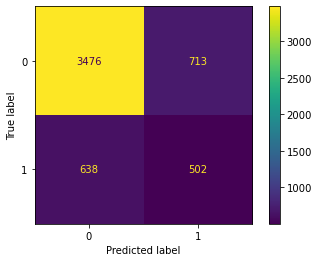

In [56]:
# Define and fit your model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_transformed, y_train)
y_test_pred = clf.predict(X_test_transformed)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_preds)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

True positives(TP)=3,476 observations.This means that out of the total dataframe, 3,476 were predicted to have taken the vaccine actually took the vaccine.

True Negatives(TN)=502 observations. This means that out of the total dataset, 502 people were correctly predicted to not have taken the vaccine.

False Positives(FP)=713 observations. Out of the total, 713 were predicted to have taken the vaccine but they did not.

False Negatives(FN)=638 observations. Out of the total, 638 were predicted to have not taken the vaccine but they did

#### Hyperparameter Tuning

To reduce overfitting

In [57]:
#Hyperparameter Tuning and Pruning in Decision Trees
# create a parameter grid
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [6, 2, 3, 4, 5, ],
    "min_samples_split": [10,2, 5],
    "min_samples_leaf": [1, 2, 3 ],
    }

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score = True )

# Fit to the data
dt_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 2, 5]},
             return_train_score=True)

In [58]:
# Calculate the mean training score from the grid search results
dt_grid_search_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Calculate the mean test score by using the best estimator from grid search
dt_grid_search_testing_score = dt_grid_search.best_estimator_.score(X_test, y_test)

# Print the mean training and test scores
print(f"Mean Training Score: {dt_grid_search_training_score:.2%}")
print(f"Mean Test Score: {dt_grid_search_testing_score:.2%}")

# Print the best parameter combination found during grid search
print("Best Parameters:")
print(dt_grid_search.best_params_)

Mean Training Score: 82.88%
Mean Test Score: 80.71%
Best Parameters:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}


For our grid search the best parameters are shown above as: 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10

The parameters will be passed to the decision tree.

In [59]:
#Fit the parameters into the decision tree
clf = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 6,
                            min_samples_leaf = 3,
                            min_samples_split = 10)

clf.fit(X_train_transformed, y_train)

y_train_pred_1 = clf.predict(X_train_transformed)
y_test_pred_1 = clf.predict(X_test_transformed)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred_1))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred_1))
print()
print('Train F1_score:', f1_score(y_train, y_train_pred_1))
print('Test F1_score:', f1_score(y_test, y_test_pred_1))
print()
print('Train Recall_score:', recall_score(y_train, y_train_pred_1))
print('Test Recall_score:', recall_score(y_test, y_test_pred_1))
print()
print('Train Precision_score:', precision_score(y_train, y_train_pred_1))
print('Test Precision_score:', precision_score(y_test,y_test_pred_1))

Train Accuracy: 0.8353040540540541
Test Accuracy: 0.8341152186151248

Train F1_score: 0.5212765957446809
Test F1_score: 0.5116022099447514

Train Recall_score: 0.4216681376875552
Test Recall_score: 0.40614035087719297

Train Precision_score: 0.6825
Test Precision_score: 0.691044776119403


There was improvements after hyperparameter tuning. Accuracy from 74% to 83% and precision from 40% to 69% F1 increased too from 41% to 51%

### 3 Random forest

In [60]:
# Create a Random Forest classifier 
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

# Fit the classifier on the training data
forest.fit(X_train_transformed, y_train)

# Make predictions on the training data
y_train_pred_forest = forest.predict(X_train_transformed)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_forest)
train_f1 = f1_score(y_train, y_train_pred_forest)
train_recall = recall_score(y_train, y_train_pred_forest)
train_precision = precision_score(y_train, y_train_pred_forest)
print('Train Accuracy:', train_accuracy)
print('Train F1:', train_f1)
print('Train Recall:', train_recall)
print('Train Precision:', train_precision)
print()
# Make predictions on the test data
y_test_pred_forest = forest.predict(X_test_transformed)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_forest)
test_f1 = f1_score(y_test, y_test_pred_forest)
test_recall = recall_score(y_test, y_test_pred_forest)
test_precision = precision_score(y_test, y_test_pred_forest)
print('Train Accuracy:', test_accuracy)
print('Test F1:', test_f1)
print('Train Recall:', test_recall)
print('Train Precision:', test_precision)

Train Accuracy: 0.8269519519519519
Train F1: 0.4012987012987013
Train Recall: 0.2727272727272727
Train Precision: 0.7592137592137592

Train Accuracy: 0.8230437230249578
Test F1: 0.37755775577557754
Train Recall: 0.25087719298245614
Train Precision: 0.7626666666666667


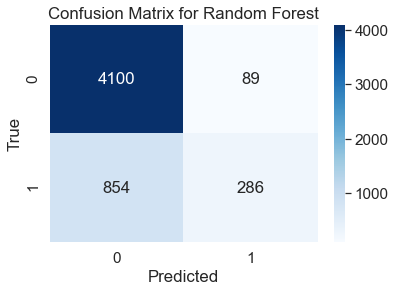

In [61]:
# Calculate the confusion matrix
labels = [0, 1]
cm = confusion_matrix(y_test, y_test_pred_forest, labels=labels)

# Plot the confusion matrix
sns.set(font_scale=1.4)  
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

#### Hyperparameter Tuning

To find best combination of hyperparameters that can maximize the model's performance.

In [62]:
# Create a RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train_transformed, y_train)

# Create a parameter grid
rf_param_grid = { 
    'n_estimators': [200, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=8, return_train_score=True)

# Fit to the data
rf_grid_search.fit(X_train_transformed, y_train)

# Get the best parameters from the grid search
best_params = rf_grid_search.best_params_

# Create a RandomForestClassifier with the best hyperparameters
rf_cv = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                             max_depth=best_params['max_depth'],
                             criterion=best_params['criterion'])
rf_cv.fit(X_train_transformed, y_train)

# Model performance evaluation on the train set
y_train_pred_forest = rf_cv.predict(X_train_transformed)
y_test_pred_forest = rf_cv.predict(X_test_transformed)

In [63]:
# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_["mean_train_score"])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test_transformed, y_test)
print(f"Mean Train Score: {rf_gs_training_score :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
print(rf_grid_search.best_params_)
print()
print('Train Accuracy:', accuracy_score(y_train, y_train_pred_forest))
#print the message
if rf_gs_testing_score > train_accuracy:
    print("Hyper-parameter tuning improves the accuracy of both test and training data, overcoming initial underfitting.")

Mean Train Score: 83.29%
Mean Test Score: 83.58%
Best Parameter Combination Found During Grid Search:
{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 500}

Train Accuracy: 0.846799924924925
Hyper-parameter tuning improves the accuracy of both test and training data, overcoming initial underfitting.


In [64]:
# Create an instance of the classifier with the specific hyperparameters
forest = RandomForestClassifier(n_estimators=200, max_depth=8, criterion="gini")

# Fit the classifier on the training data
forest.fit(X_train_transformed, y_train)

# Make predictions on the training data
y_train_pred_forest = forest.predict(X_train_transformed)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_forest)
train_f1 = f1_score(y_train, y_train_pred_forest)
train_recall = recall_score(y_train, y_train_pred_forest)
train_precision = precision_score(y_train, y_train_pred_forest)
print('Train Accuracy:', train_accuracy)
print('Train F1:', train_f1)
print('Train Recall:', train_recall)
print('Train Precision:', train_precision)
print()
# Make predictions on the test data
y_test_pred_forest = forest.predict(X_test_transformed)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_forest)
test_f1 = f1_score(y_test, y_test_pred_forest)
test_recall = recall_score(y_test, y_test_pred_forest)
test_precision = precision_score(y_test, y_test_pred_forest)
print('Train Accuracy:', test_accuracy)
print('Test F1:', test_f1)
print('Train Recall:', test_recall)
print('Train Precision:', test_precision)

Train Accuracy: 0.847362987987988
Train F1: 0.5164263416084437
Train Recall: 0.3832744924977935
Train Precision: 0.7913439635535308

Train Accuracy: 0.8348658284856446
Test F1: 0.47990543735224594
Train Recall: 0.356140350877193
Train Precision: 0.7355072463768116


Every score has improved with hyperparameter tuning.

# 5. Models Evaluation

#### ROC Curve for further analysis

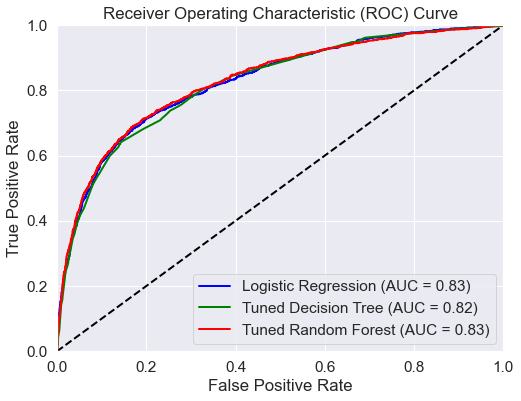

In [65]:
# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_transformed, y_train)
logreg_probs = logreg_model.predict_proba(X_test_transformed)[:, 1]

# Hyperparameter Tuned Decision Trees model
dt_tuned_probs = dt_grid_search.predict_proba(X_test_transformed)[:, 1]

# Hyperparameter Tuned Random Forest model
rf_tuned_probs = rf_grid_search.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, dt_tuned_probs)
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, rf_tuned_probs)

# Compute AUC (Area Under the Curve) for each model
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='green', lw=2, label=f'Tuned Decision Tree (AUC = {roc_auc_dt_tuned:.2f})')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='red', lw=2, label=f'Tuned Random Forest (AUC = {roc_auc_rf_tuned:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Both Tuned Random Forest Model and Logistic Regression model achieve an accuracy of 83%, which is slightly higher than the Decision Trees model (82%). The hyperparameter tuning has led to a modest improvement in overall accuracy.

The Random Forest model however, is successfull in identifying a higher proportion of actual positives.

The Tuned Random Forest Model exhibits fewer false positives but higher false negatives compared to other models. This suggests trade offs will need to be carried out.

In summary, the Tuned Random Forest Model demonstrates a subtle enhancement in key metrics, providing a more refined and optimized solution for predicting H1N1 vaccination status. The adjustments made during hyperparameter tuning contribute to improved model performance, particularly in capturing positive instances.

#### Confusion Matrix analysis

The Random Forest model is successfull in identifying a higher proportion of actual positives.

The Tuned Random Forest Model exhibits fewer false positives but higher false negatives compared to other models. This means, resource allocation and necessary interventions will be done by the relevant authorities.

## Findings and Conclusions

Our model(Random Forest) has a great performance of 83%. This means that, in a 100 test samples, 83 of them will be classified correctly.
From the Data Exploratory Analysis we have the following findings:

 The number of people who received the h1n1 vaccine is lower than those who didn't receive the vaccine.

 Most of those who received the vaccine were male.
    
 Most of the health workers received the vaccine.

 The older people(65 Years and above) received the vaccine in high numbers compared to the young people.
    
 The number of those who received the vaccination through reccomendation by a doctor was also high.
 People with chronic medical conditions did not receive the vaccine.
    
 Factors like Education level, employment status and race rarely affected the vaccination rate.

# Recommendations

The public health sector should prioritize educational and awareness campaigns to debunk vaccine-related myths and misconceptions. This approach has the potential to boost vaccine acceptance rates.

Vaccinate more older people than already vaccinated because they are willing to partake the vaccine.

Doctors' recomendation helps really helped so the authority should engage more doctors in their educational awareness campaigns

Avail more ways to ensure the vaccines reaches the poverty stricken society who had a very low uptake